# EDA of Titanic Dataset

Dataset : https://www.kaggle.com/c/titanic/data

### Data Descriptions

- Survival : 0 = No, 1 = Yes
- pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex(Gender) : Male, Female
- Age : Age in years
- SibSp : Number of siblings/spouses abroad the titanic
- Parch : Number of parents/children abrod the titanic
- Ticket : Ticket Number
- Fare : Passenger fare
- Cabin : Cabin Number
- Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 90

In [3]:
# Loading titanic dataset
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**We can see that `age`, `embarked` and `deck` columns have null values.**

### Heatmap

In [8]:
plt.style.use('ggplot')

#### Visualizing Null Values using heatmap

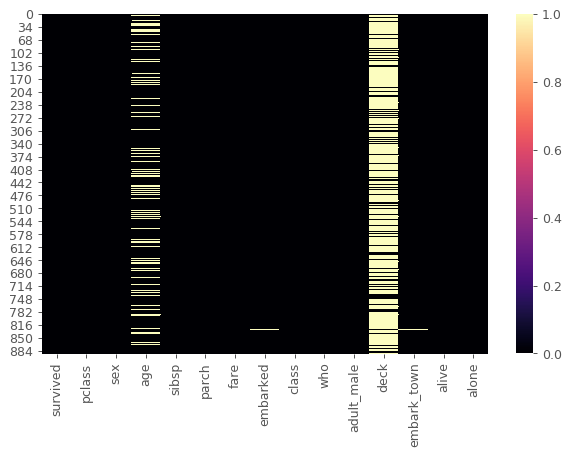

In [9]:
sns.heatmap(titanic.isnull(), cmap = 'magma')

In [10]:
corrmat = titanic.corr()
corrmat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


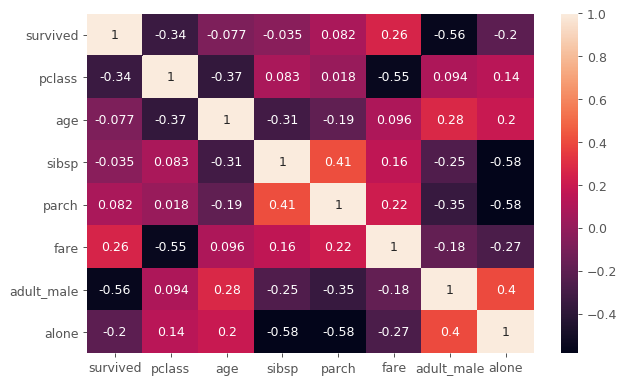

In [11]:
sns.heatmap(corrmat, annot = True)
plt.show()

**We will not use heatmap to find correlation in our dataset because for categorical variables heatmap is not suitable.**

### Univariate Analysis

In [12]:
cols = titanic.columns
print(list(cols))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


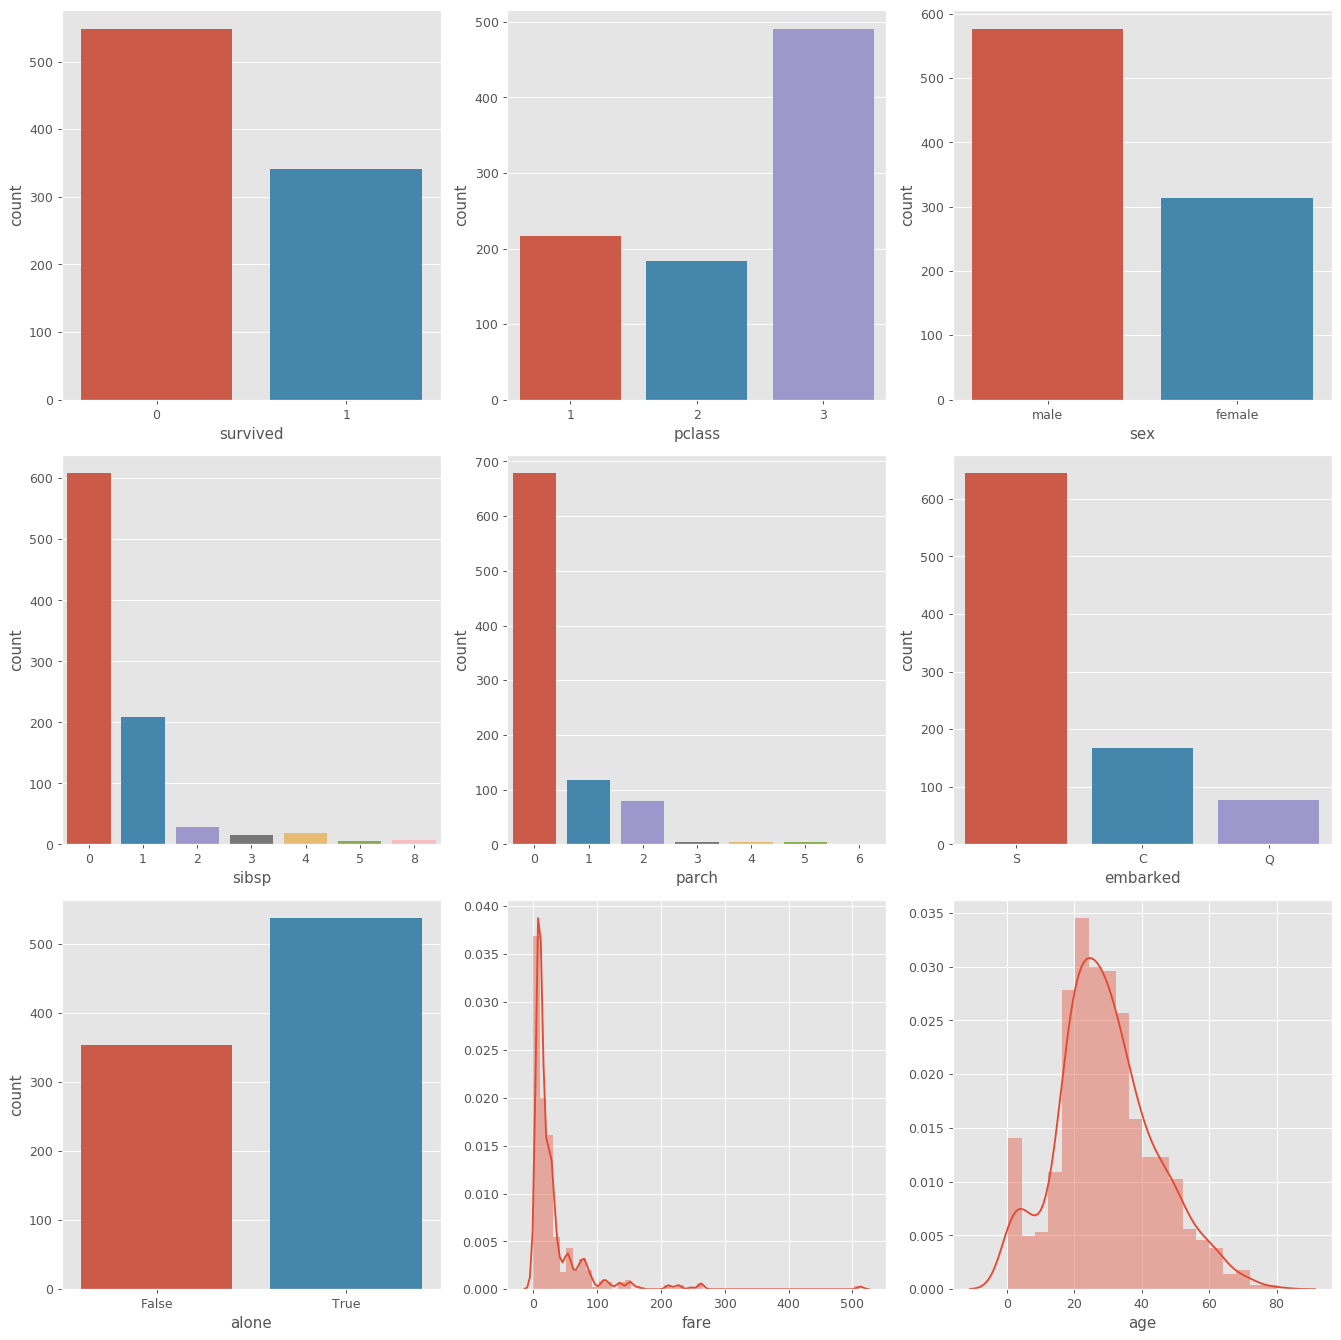

In [13]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))

sns.countplot('survived', data = titanic, ax = ax[0][0])
sns.countplot('pclass', data = titanic, ax = ax[0][1])
sns.countplot('sex', data = titanic, ax = ax[0][2])
sns.countplot('sibsp', data = titanic, ax = ax[1][0])
sns.countplot('parch', data = titanic, ax = ax[1][1])
sns.countplot('embarked', data = titanic, ax = ax[1][2])
sns.countplot('alone', data = titanic, ax = ax[2][0])

sns.distplot(titanic['fare'], kde = True, ax = ax[2][1])
sns.distplot(titanic['age'], kde = True, ax = ax[2][2])

plt.tight_layout()
plt.show()

**Information we can get from above graphs are:-**
- Around 530 peoples could not survive and almost 320 peoples survived.**
- Most of peoples were travelling in 3rd passenger class.
- Most of the peoples on the boat were males.
- Most of the peoples were travelling alone.
- Most of the peoples have Southampton Port of Embarkation. 
- Most of the ticket fares were low and some fares were high.
- Most of the people who were travelling have age between 20 and 40 but there were high number of childrens also.**

### Now we will do analysis of each column.

## Survived

In [14]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

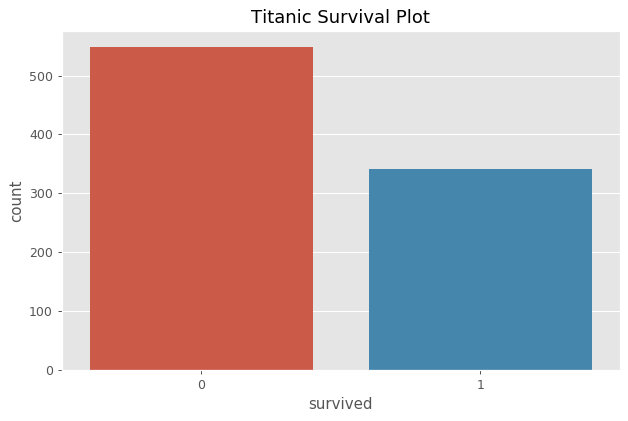

In [15]:
sns.countplot('survived', data = titanic)
plt.title('Titanic Survival Plot')
plt.show()

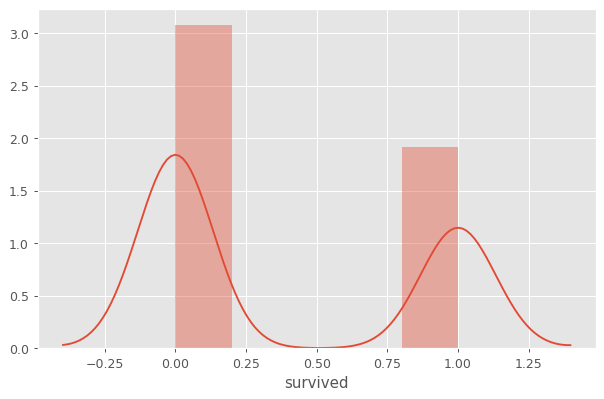

In [16]:
sns.distplot(titanic['survived'])
plt.show()

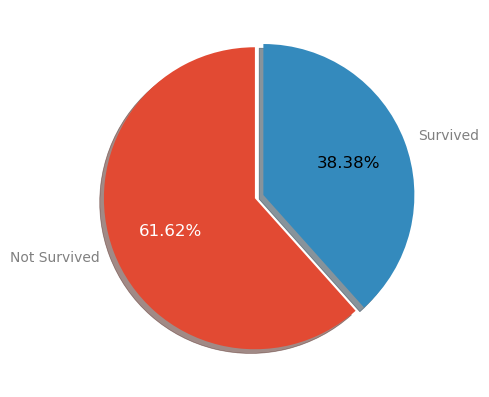

In [17]:
values = titanic['survived'].value_counts()
labels = ['Not Survived', 'Survived']

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

## PClass

In [18]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [19]:
titanic.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

**We can conclude that if passenger class is high than survival rate is also high and if passenger class is low than survival rate is also low.**

### Visualization of pclass column

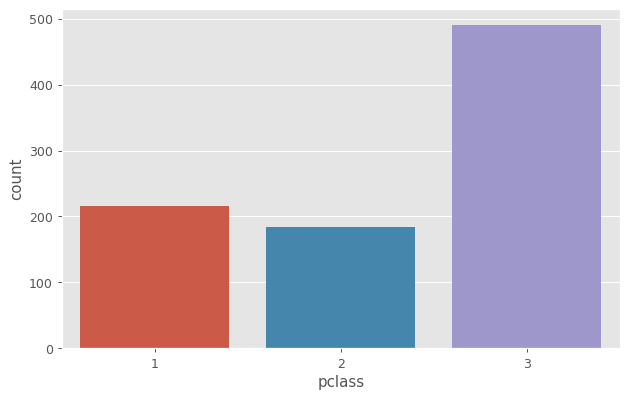

In [20]:
sns.countplot('pclass', data = titanic)
plt.show()

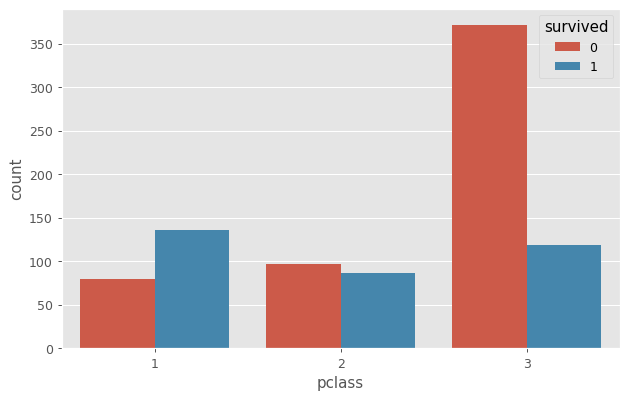

In [21]:
sns.countplot('pclass', data = titanic, hue = 'survived')
plt.show()

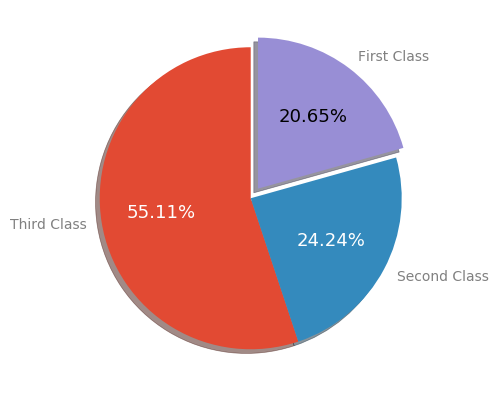

In [22]:
values = titanic['pclass'].value_counts()
labels = ['Third Class', 'Second Class', 'First Class']
explode = (0, 0, 0.08)

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 13, color = 'white')
autotexts[2].set_color('black')
plt.show()

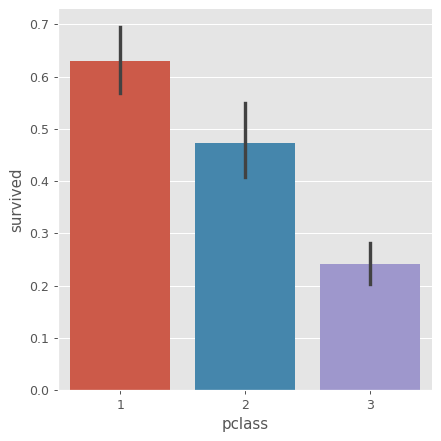

In [23]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'bar', data = titanic)
plt.show()

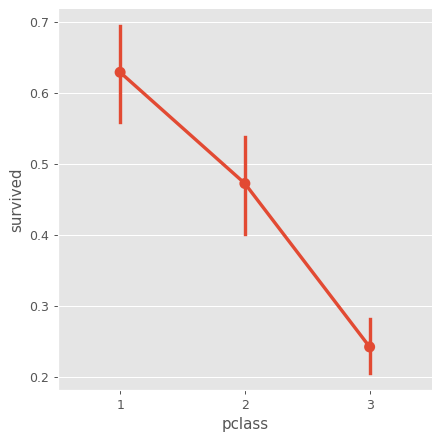

In [24]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'point', data = titanic)
plt.show()

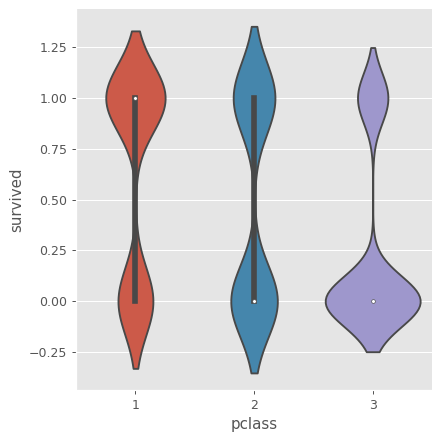

In [25]:
sns.catplot(x = 'pclass', y = 'survived', data = titanic, kind = 'violin')
plt.show()

**From above graphs we can conclude that probabilty of survival is higher if passenger is travelling in first class and second class and probability of survival is lower if passenger is travelling in third class.**

## Sex

In [26]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [27]:
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

**Females Survived more than Males.**

### Visualization of Sex column

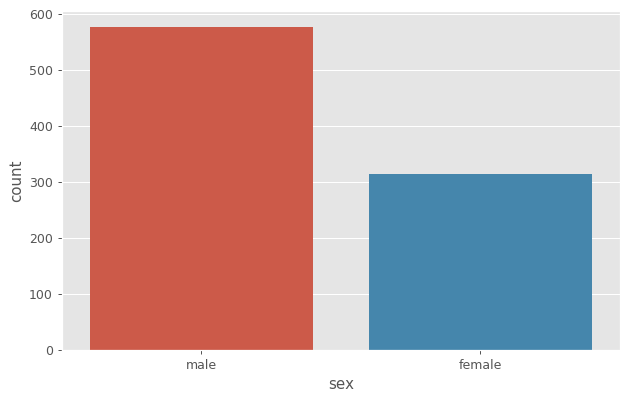

In [28]:
sns.countplot('sex', data = titanic)
plt.show()

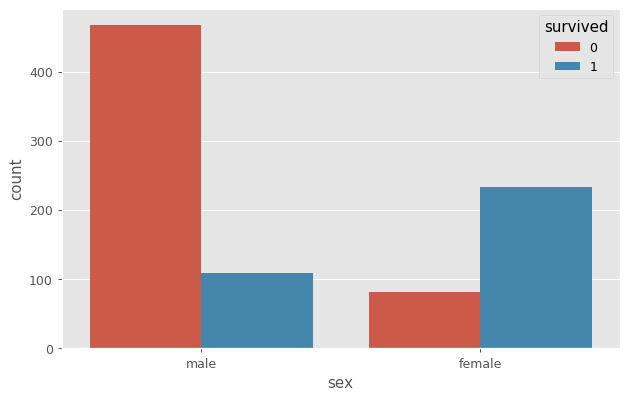

In [29]:
sns.countplot('sex', data = titanic, hue = 'survived')
plt.show()

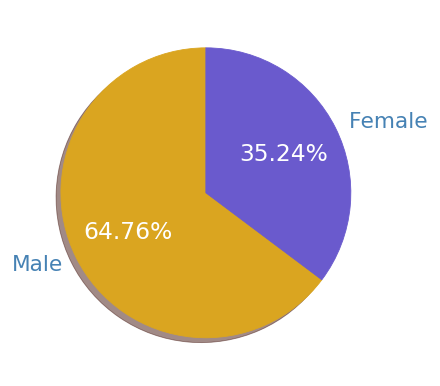

In [30]:
values = titanic['sex'].value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize = (4, 4), dpi = 120)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True, startangle = 90)

plt.setp(texts, size = 13, color = 'steelblue')
plt.setp(autotexts, size = 14, color = 'w')
patches[0].set_color('goldenrod')
patches[1].set_color('slateblue')
plt.show()

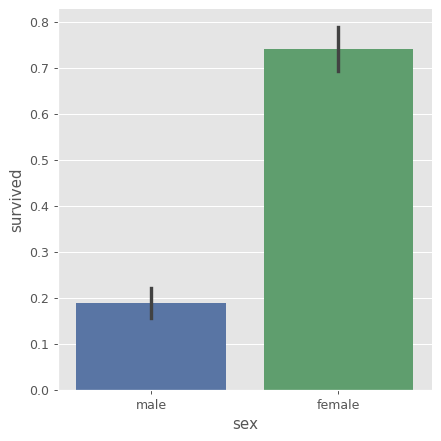

In [31]:
plt.style.use('seaborn-deep')
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic)
plt.show()

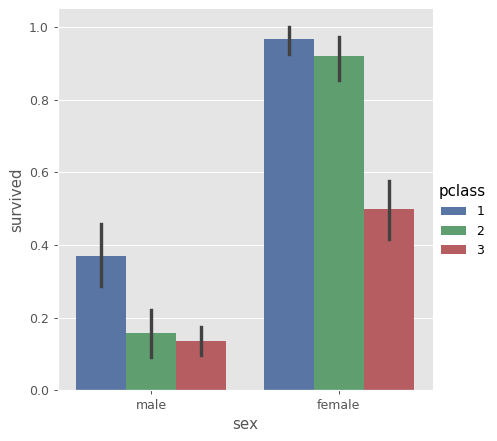

In [32]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, hue = 'pclass')
plt.show()

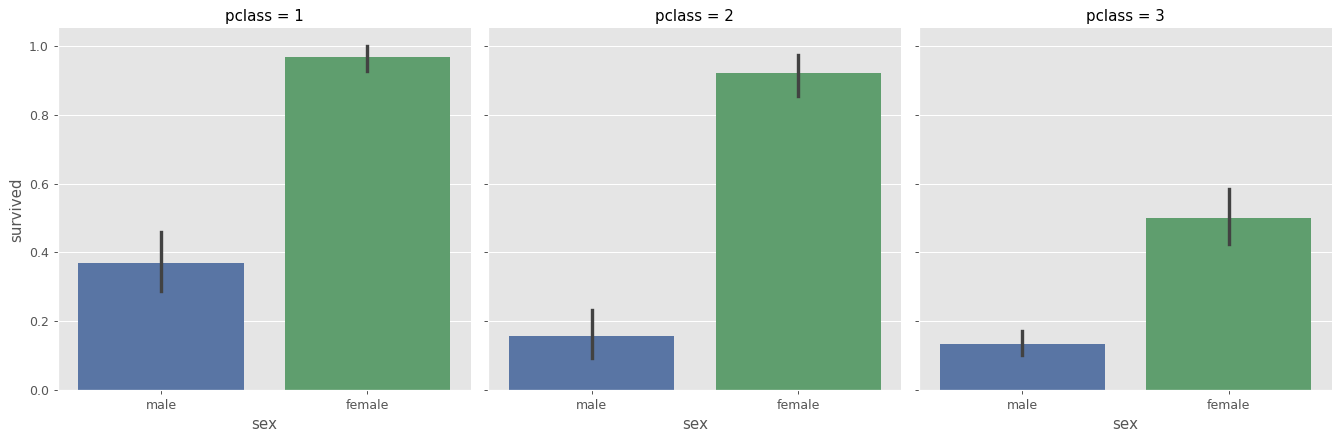

In [33]:
sns.catplot(x = 'sex', y = 'survived', data = titanic, kind = 'bar', col = 'pclass')
plt.show()

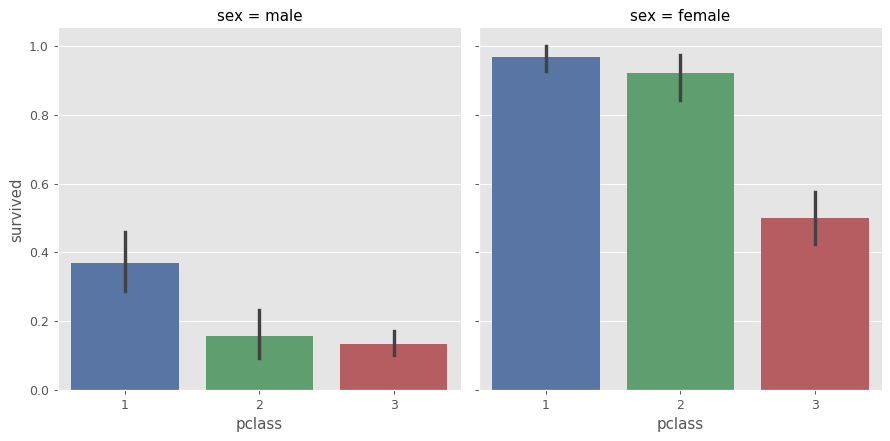

In [34]:
sns.catplot(x = 'pclass', y = 'survived', data = titanic, kind = 'bar', col = 'sex')
plt.show()

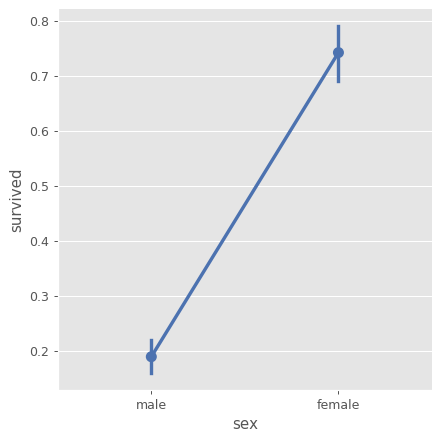

In [35]:
sns.catplot(x = 'sex', y = 'survived', data = titanic, kind = 'point')
plt.show()

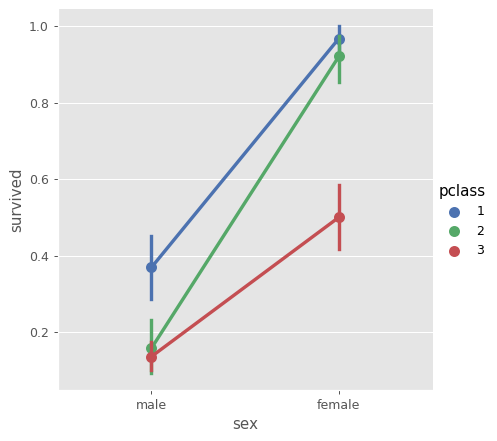

In [36]:
sns.catplot(x = 'sex', y = 'survived', kind = 'point', data = titanic, hue = 'pclass')
plt.show()

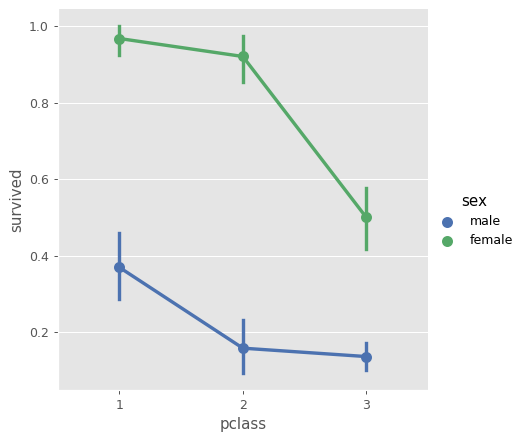

In [37]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'point', data = titanic, hue = 'sex')
plt.show()

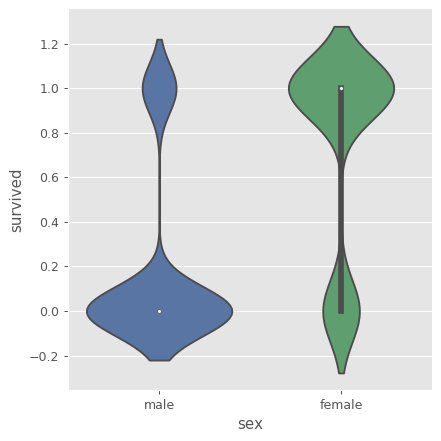

In [38]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin',  data = titanic)
plt.show()

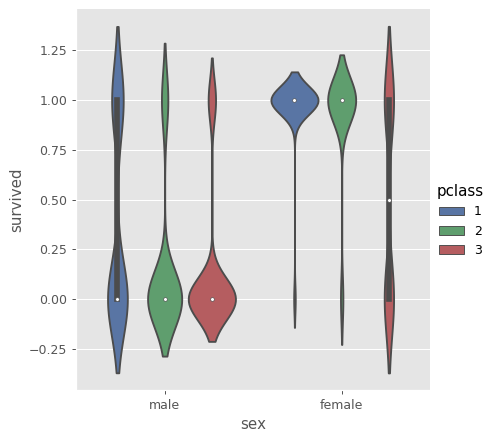

In [39]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic, hue = 'pclass')
plt.show()

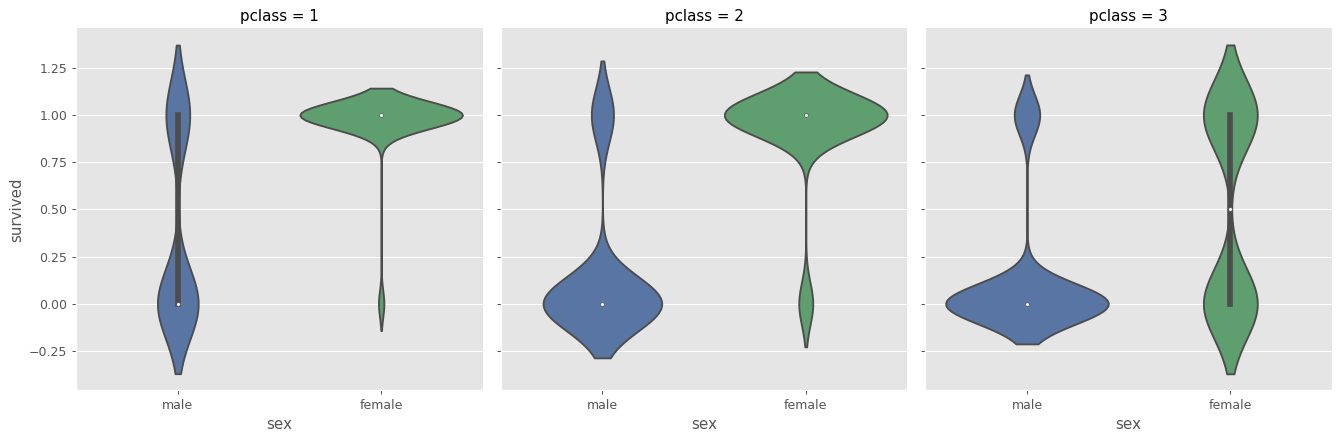

In [40]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic, col = 'pclass')
plt.show()

**We can say that survival rate of females of first and second class is very high and survival rate of females of third class is also greater than males of first class and if passenger is male than only first class passengers have higher rate of survival.**

## Age

C:\Users\nites\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nites\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


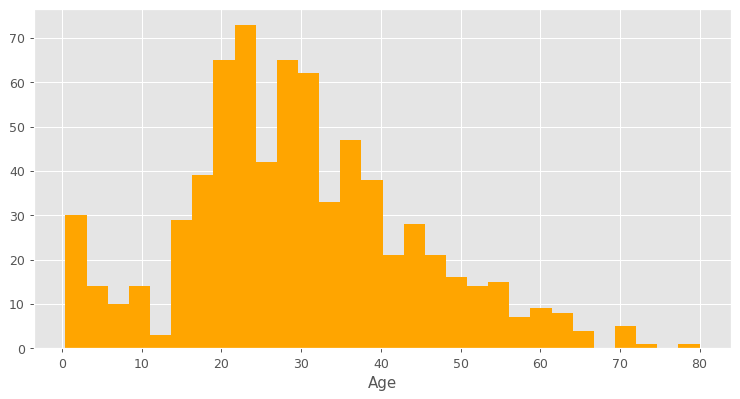

In [41]:
plt.figure(figsize = (10, 5))
plt.hist(titanic['age'], bins = 30, color = 'orange')
plt.xlabel('Age')
plt.show()

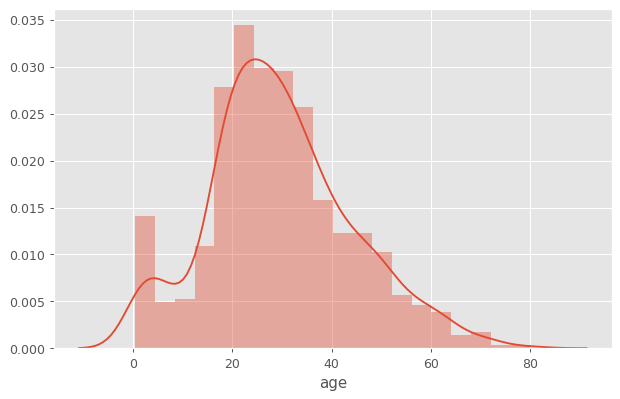

In [42]:
plt.style.use('ggplot')
sns.distplot(titanic['age'])
plt.show()

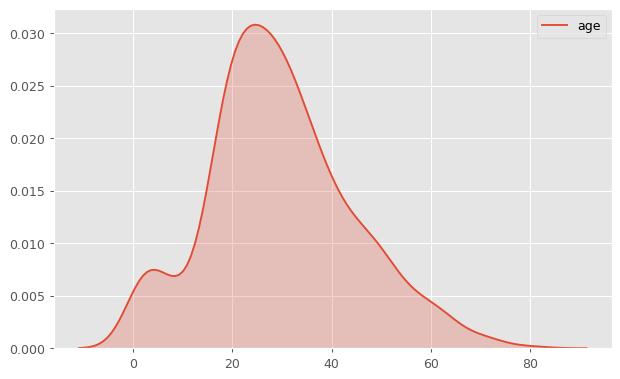

In [43]:
sns.kdeplot(titanic.age,  shade = True)

**From these graphs we can conclude that there were two major age groups one between age 0-10 and one between age 20-40.**

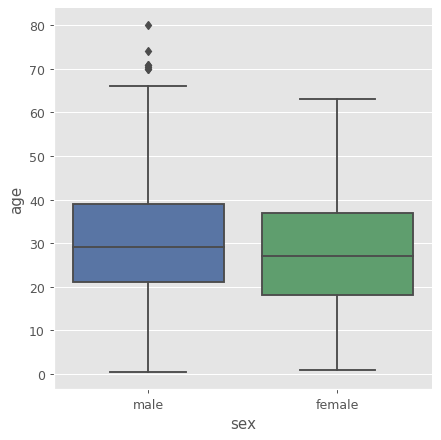

In [44]:
plt.style.use('seaborn-deep')
sns.catplot(x = 'sex', y = 'age', kind = 'box', data = titanic)
plt.show()

**Males were older than Females.**

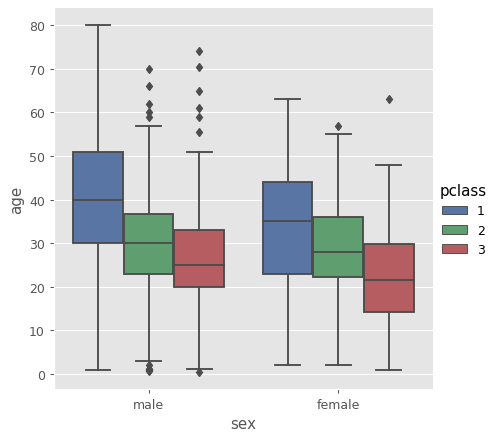

In [45]:
sns.catplot(x = 'sex', y = 'age', kind = 'box', data = titanic, hue = 'pclass')
plt.show()

**First class passengers were older than second and third class passengers.**

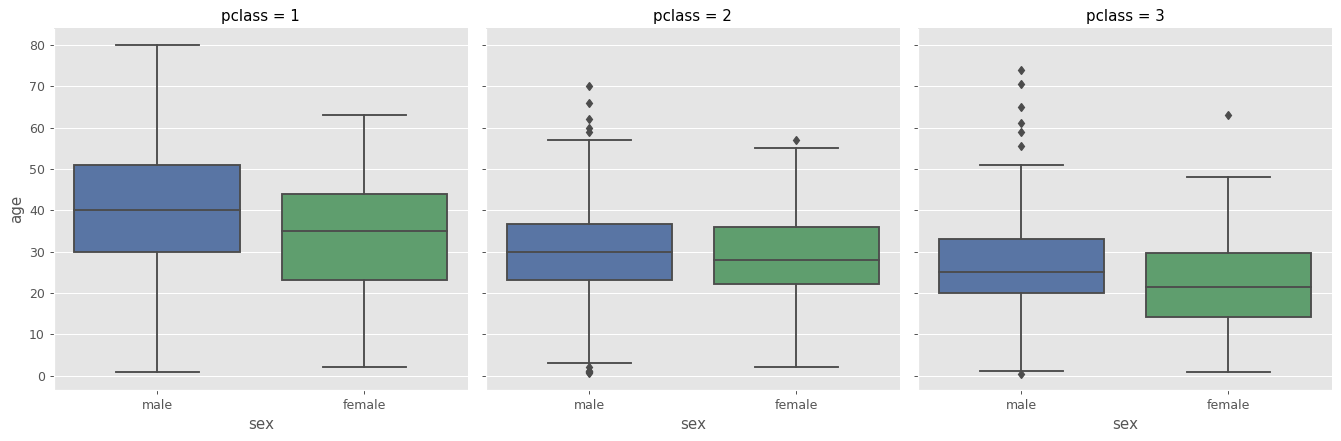

In [46]:
sns.catplot(x = 'sex', y = 'age', kind = 'box', data = titanic, col = 'pclass')
plt.show()

**Average age of second and third class is almost equal and average age of third class is greater than second and third class.**

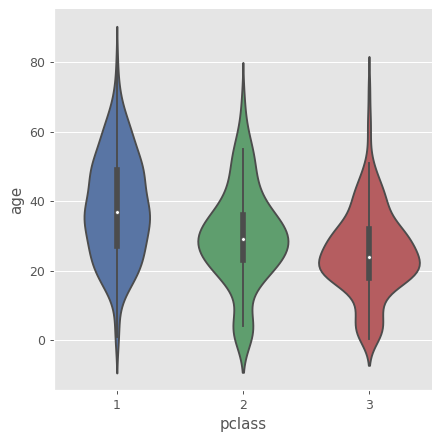

In [47]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin')
plt.show()

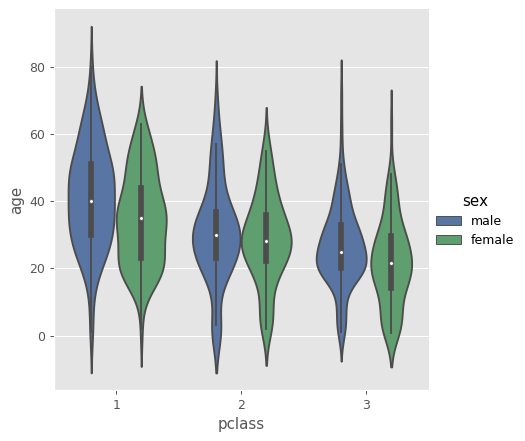

In [48]:
sns.catplot(x = 'pclass', y = 'age', kind = 'violin', data = titanic, hue = 'sex')
plt.show()

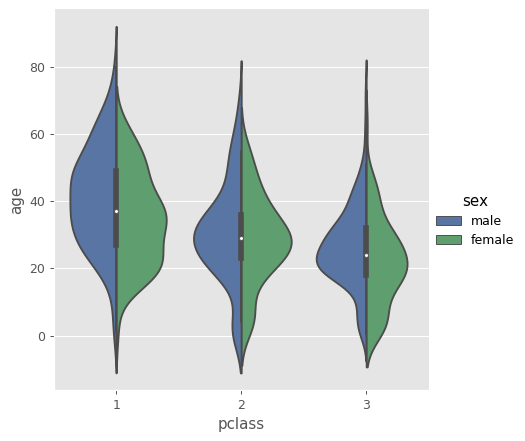

In [49]:
sns.catplot(x = 'pclass', y = 'age', kind = 'violin', data = titanic, hue = 'sex', split = True)
plt.show()

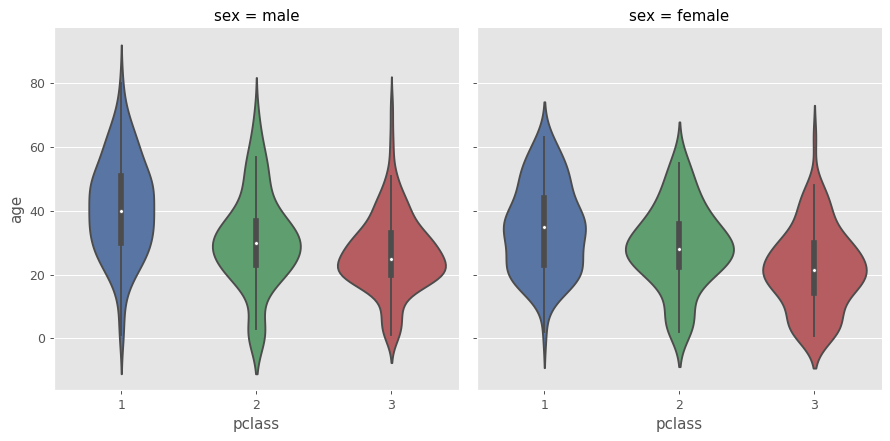

In [50]:
sns.catplot(x = 'pclass', y = 'age', kind = 'violin', data = titanic, col = 'sex')
plt.show()

C:\Users\nites\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\nites\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


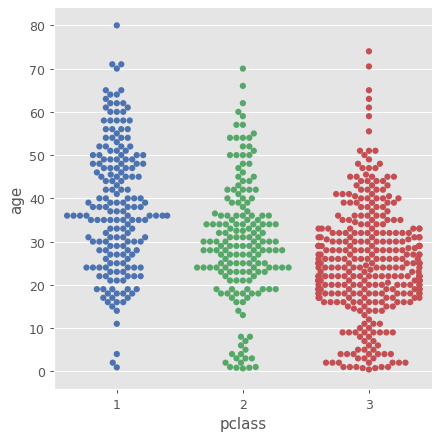

In [51]:
sns.catplot(x = 'pclass', y = 'age', kind = 'swarm', data = titanic)
plt.show()

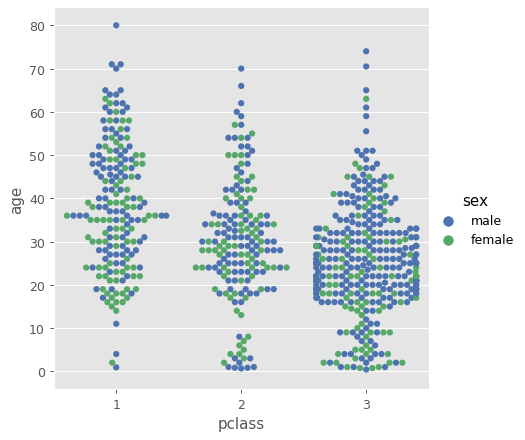

In [52]:
sns.catplot(x = 'pclass', y = 'age', kind = 'swarm', data = titanic, hue = 'sex')
plt.show()

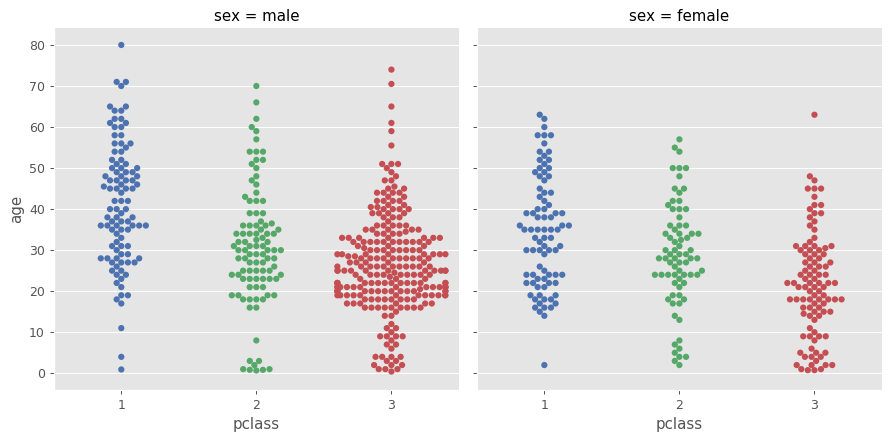

In [53]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'swarm', col = 'sex')
plt.show()

**In class 3 there are more males than females.**

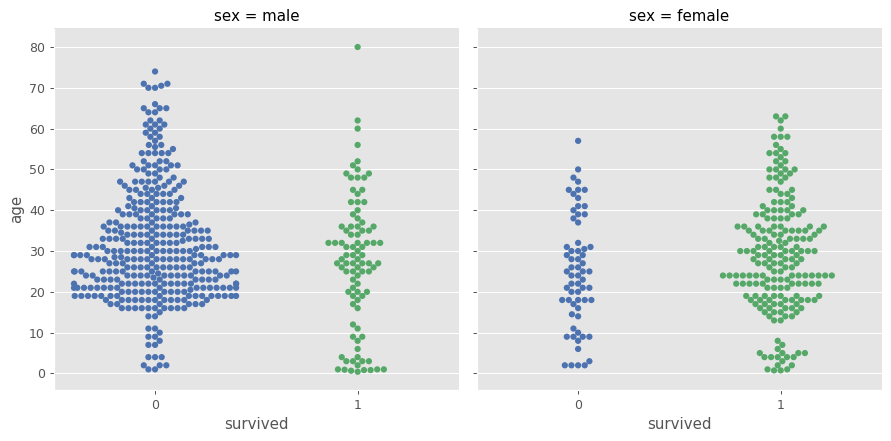

In [54]:
sns.catplot(x = 'survived', y = 'age', data = titanic, kind = 'swarm', col = 'sex')
plt.show()

**In Males there were less numbers of passengers who were survived and in females there were more numbers of passengers who were survived.**

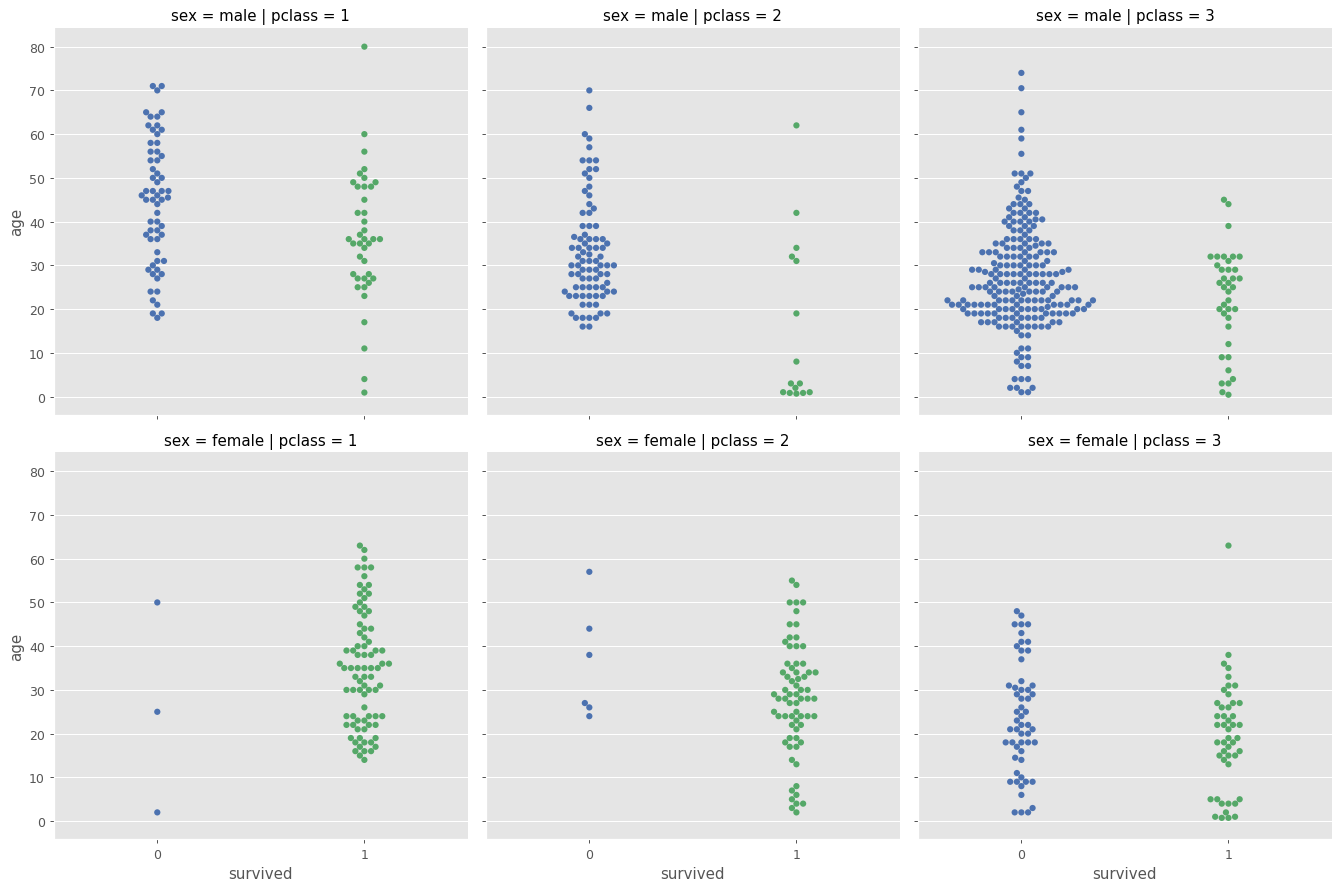

In [55]:
sns.catplot(x = 'survived', y = 'age', data = titanic, kind = 'swarm', row = 'sex', col = 'pclass')
plt.tight_layout()
plt.show()

- In class 1 mostly all females were survived and males were survived in equal proportion in which males were died.
- In class 2 more males were died than survived and in females more females were survived than died.
- In class 3 more males were died than survived and in females equal number of females survived and died.

## Fare

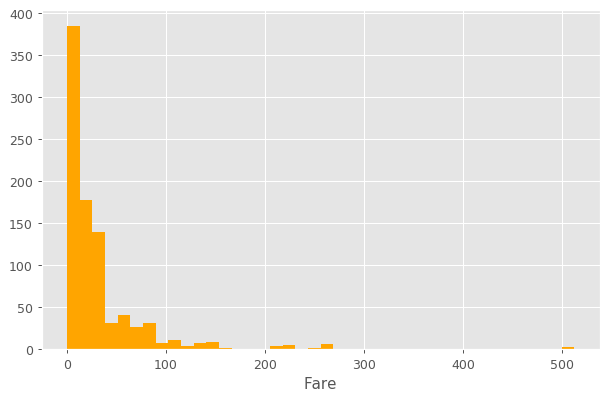

In [56]:
plt.hist(titanic.fare, bins = 40, color = 'orange')
plt.xlabel('Fare')
plt.show()

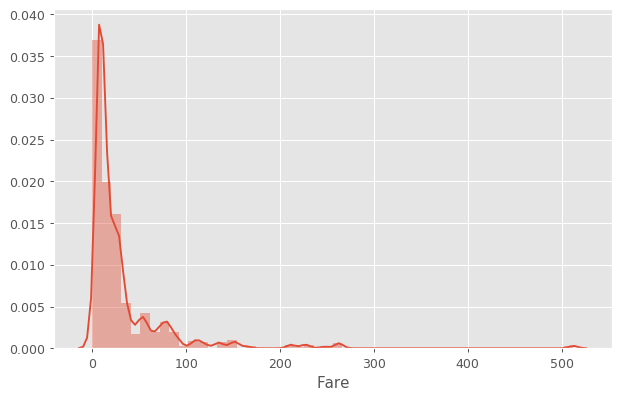

In [57]:
plt.style.use('ggplot')
sns.distplot(titanic.fare)
plt.xlabel('Fare')
plt.show()

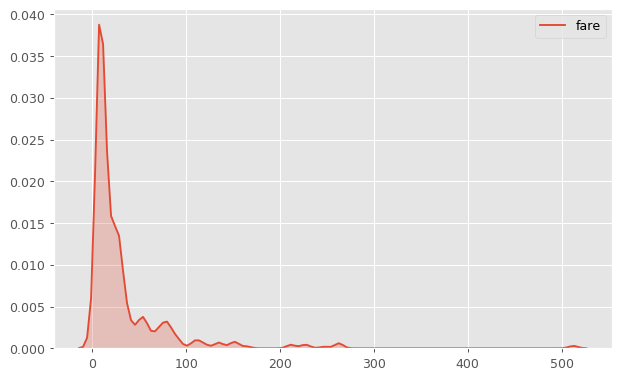

In [58]:
sns.kdeplot(titanic.fare, shade = True)
plt.show()

**Most of the peoples fare is around 10-50.**

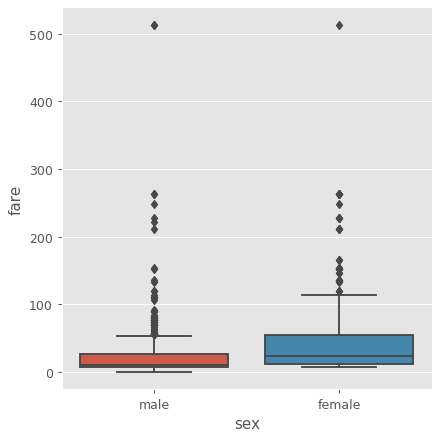

In [59]:
sns.catplot(x = 'sex', y = 'fare', kind = 'box', data = titanic)
plt.show()

**Fare of Females is Higher than Males this could happen because more males were travelling in third class and more females were travelling in first and second class.**

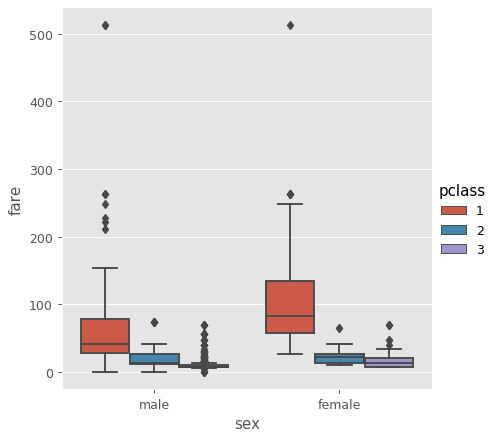

In [60]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'box', hue = 'pclass')
plt.show()

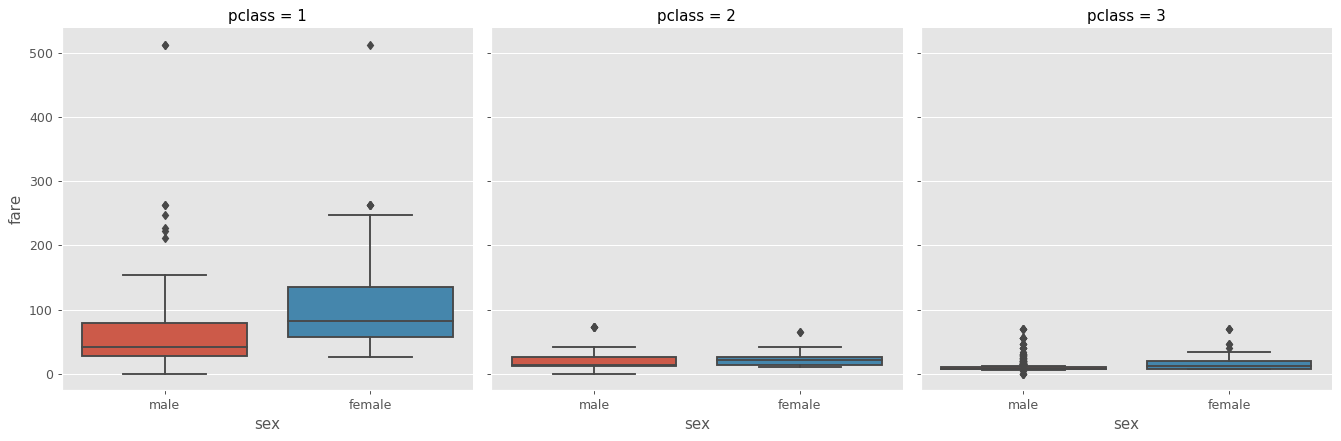

In [61]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'box', col = 'pclass')
plt.show()

- For females there is high fare than males in class 1 this difference could be because more services are provided to females. 
- For second and third class passengers fare is relatively low in comparisson of first class passengers.

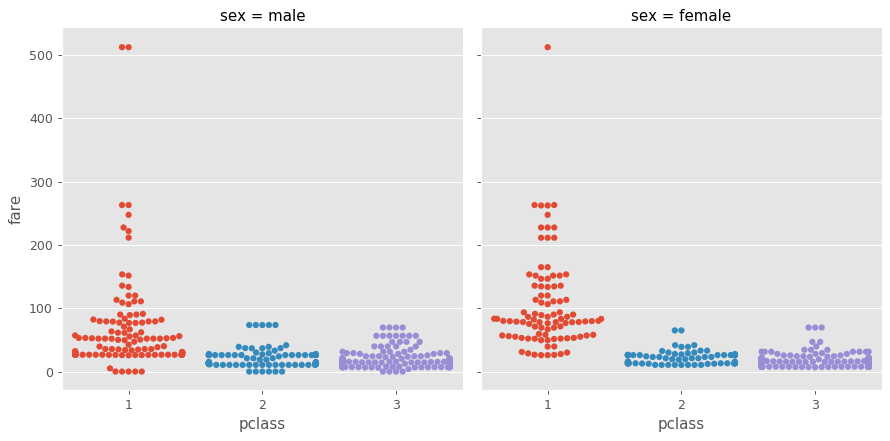

In [62]:
sns.catplot(x = 'pclass', y = 'fare', data = titanic, kind = 'swarm', col = 'sex')
plt.show()

**For first class passengers females were paying maore than males and for other class fares were almost same.**

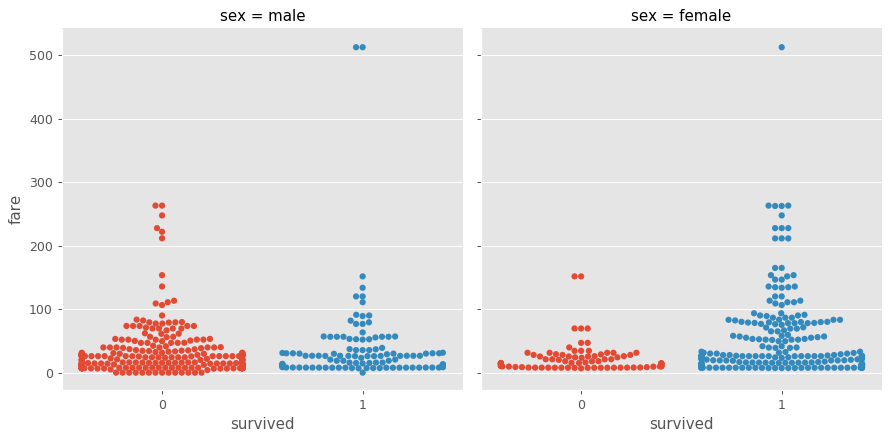

In [63]:
sns.catplot(x = 'survived', y = 'fare', data = titanic, kind = 'swarm', col = 'sex')
plt.show()

**female passengers survived more than males and for female passengers who survived fare is also higher and for male passengers fare doesn't matter much.**

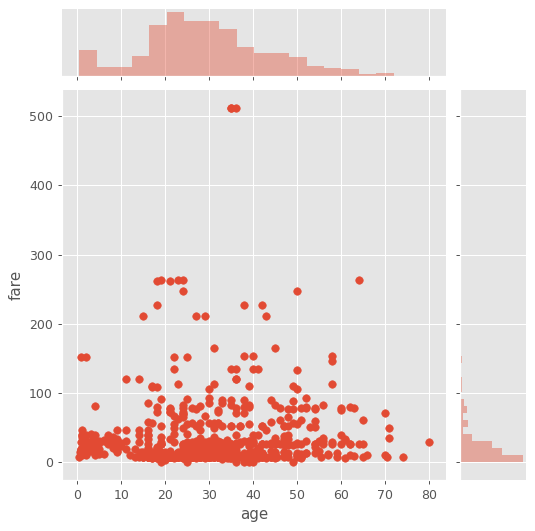

In [64]:
sns.jointplot(x = 'age', y = 'fare', data = titanic)
plt.show()

**There is no such correlation between age and fare.**

## SibSp

In [65]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

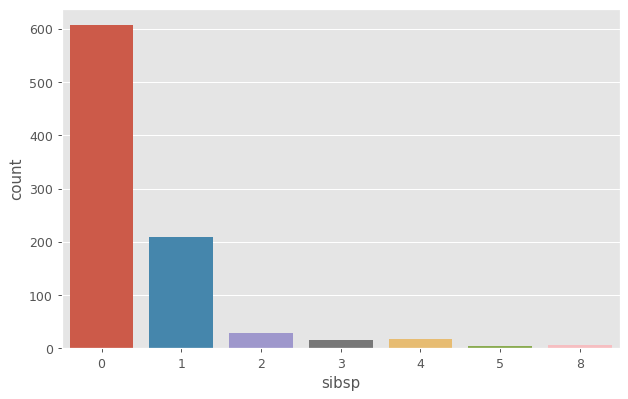

In [66]:
sns.countplot('sibsp', data = titanic)
plt.show()

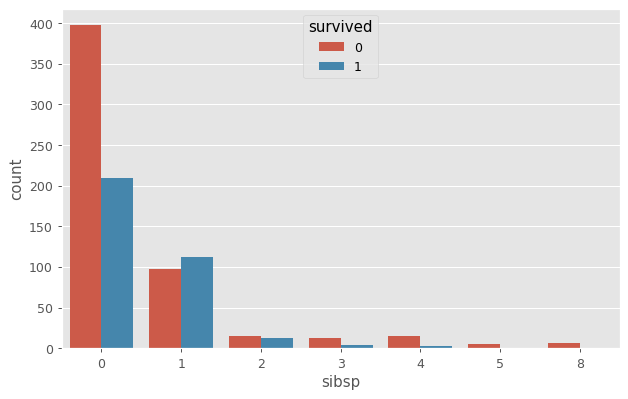

In [67]:
sns.countplot(x = 'sibsp', data = titanic, hue = 'survived')
plt.show()

- Almost half of the people survived who were travelling alone.
- Almost equal number of people survived when they were travelling with either spouse or with sibbling.

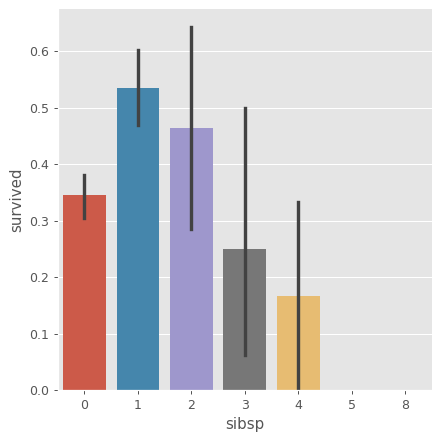

In [68]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic)
plt.show()

**When a passenger is travelling with atleast one sibling or spouse probability of survival is higher than a passenger is travelling without a sibling/spouse or travelling with group.**

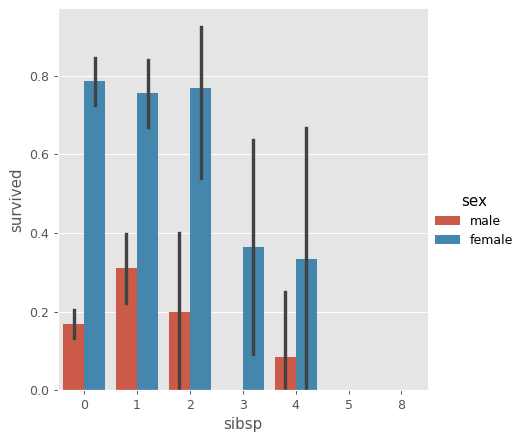

In [69]:
sns.catplot(x = 'sibsp', y = 'survived', data = titanic, kind = 'bar', hue = 'sex')
plt.show()

- Probability of survival of females is high weather they travel with sibling/spouse or not.
- Survival rate of males is also high when they travel in groups.

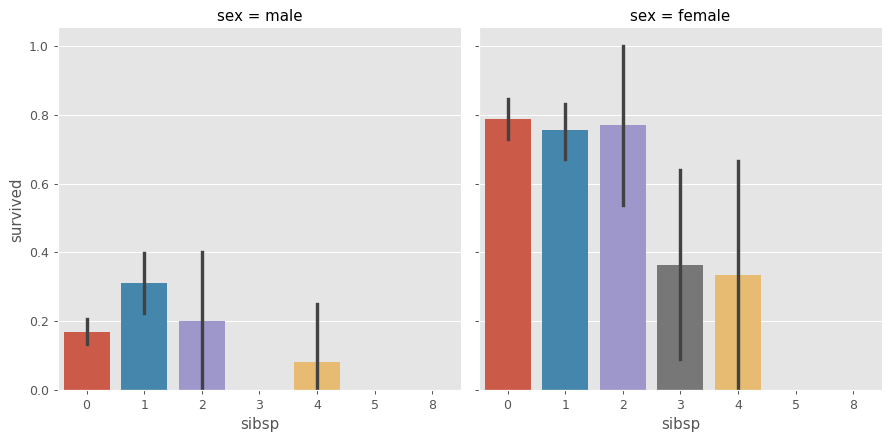

In [70]:
sns.catplot(x = 'sibsp', y = 'survived',kind = 'bar', data = titanic, col = 'sex')
plt.show()

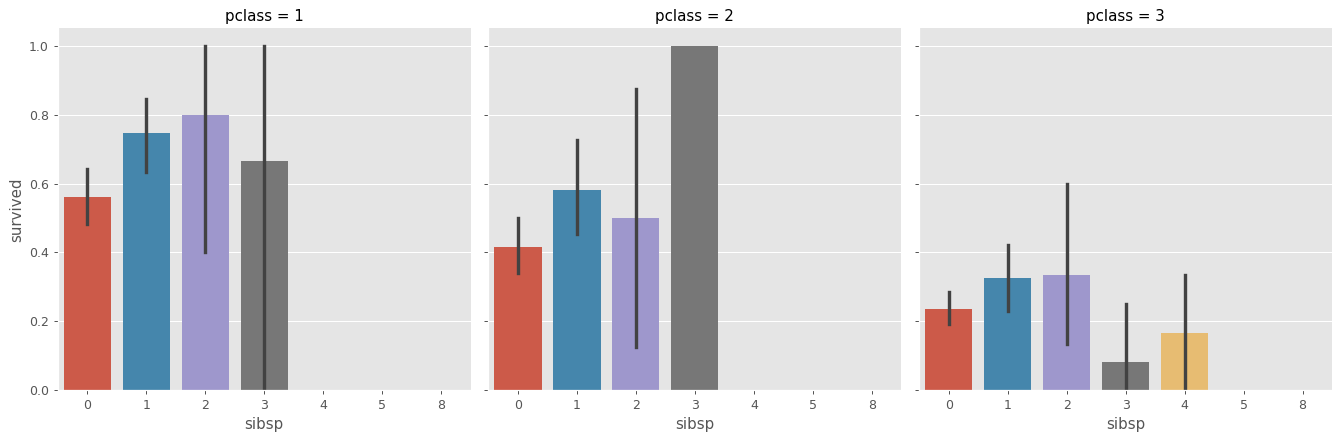

In [71]:
sns.catplot(x = 'sibsp', y = 'survived', data = titanic, kind = 'bar', col = 'pclass')
plt.show()

**passengers who were travelling in group of 3 means 3 siblings/spouses of class 2 have almost 100% probability of survival.**

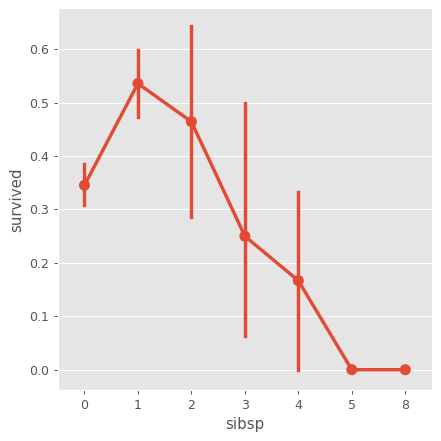

In [72]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'point', data = titanic)
plt.show()

**Passengers travelling with 1 sibling/spouse have higher survival rate.**

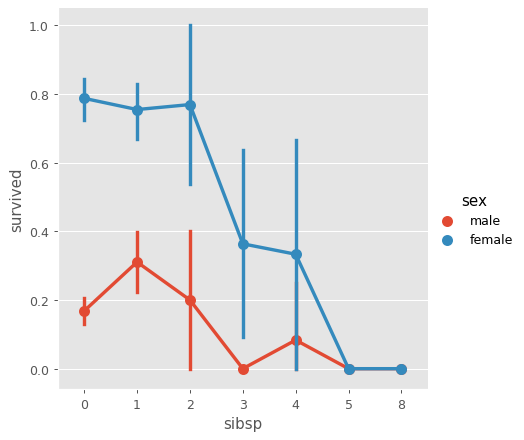

In [73]:
sns.catplot(x = 'sibsp', y = 'survived', data = titanic, kind = 'point', hue = 'sex')
plt.show()

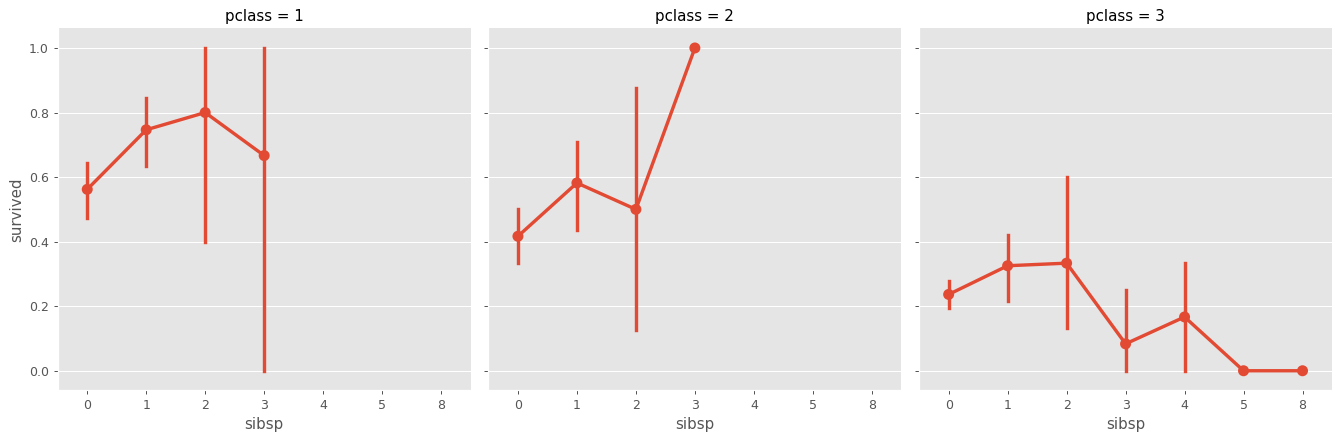

In [74]:
sns.catplot(x = 'sibsp', y = 'survived', data = titanic, kind = 'point', col = 'pclass')
plt.show()

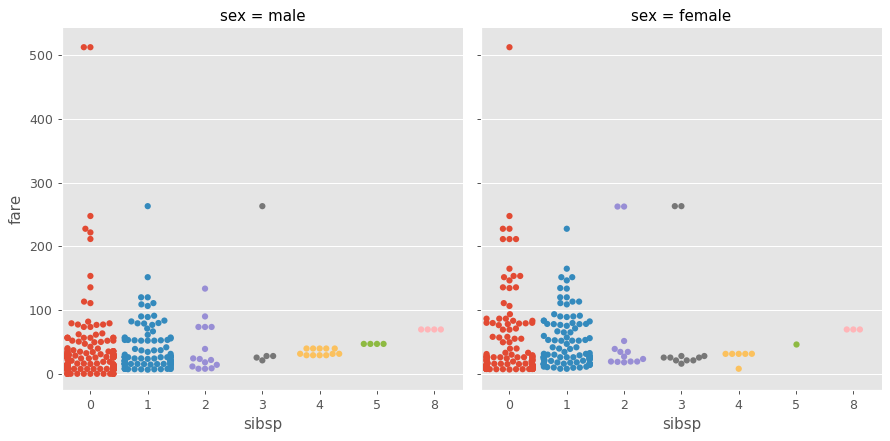

In [75]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'swarm', col = 'sex')
plt.show()

**Fare for females is higher than males.**

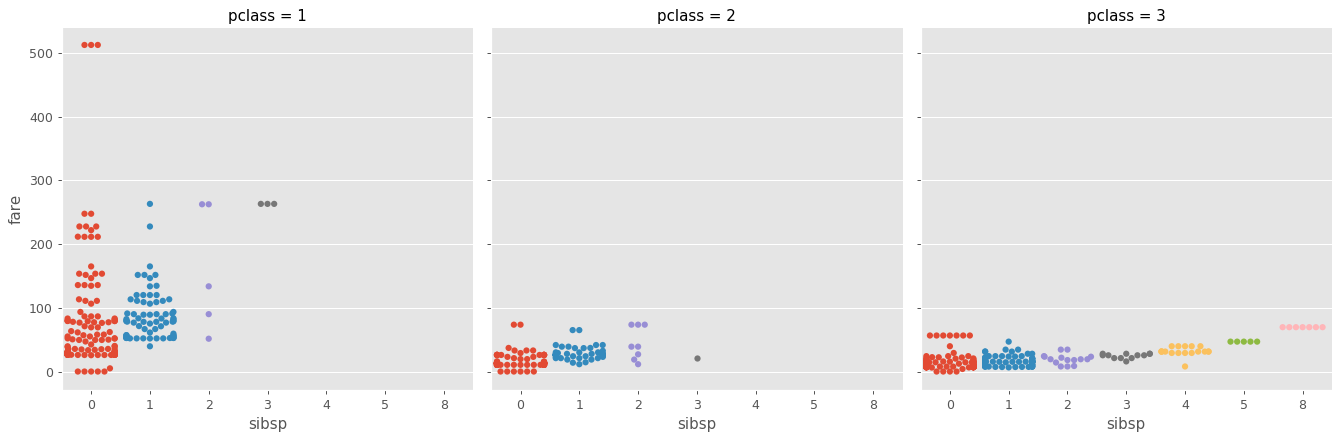

In [76]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass')
plt.show()

- In class 1 and 2 fare of passengers having sibling/spouse is higher than passengers that were travelling alone.
- In class 3 as no of sibling/spouse increses fare also increses.

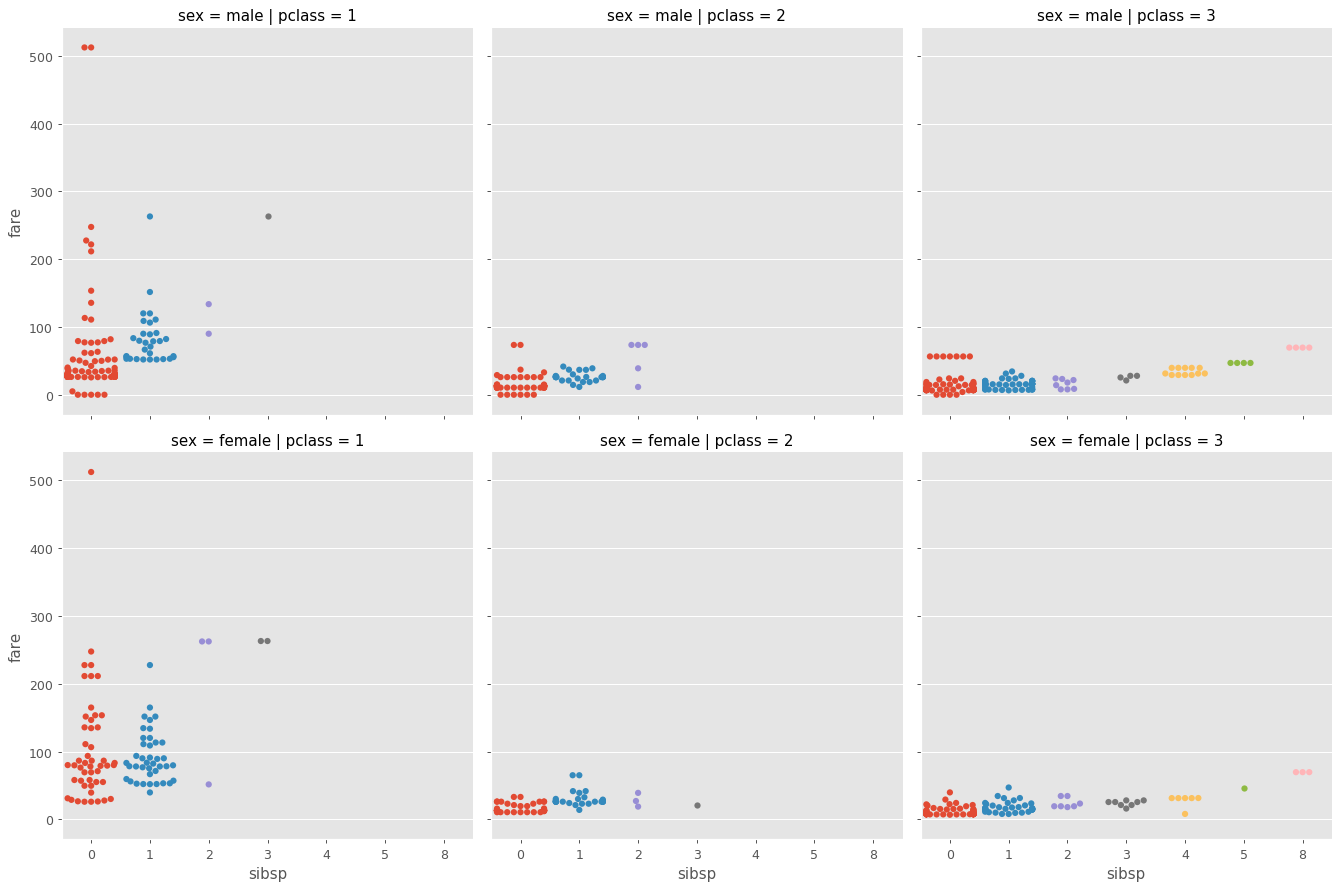

In [77]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass', row = 'sex')
plt.show()

- Fare of first class male passengers is high than female passengers which have 1 sibling/spouse. 
- In class 3 as number of spouses increses fare also increases.

## Parch

In [78]:
titanic.parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

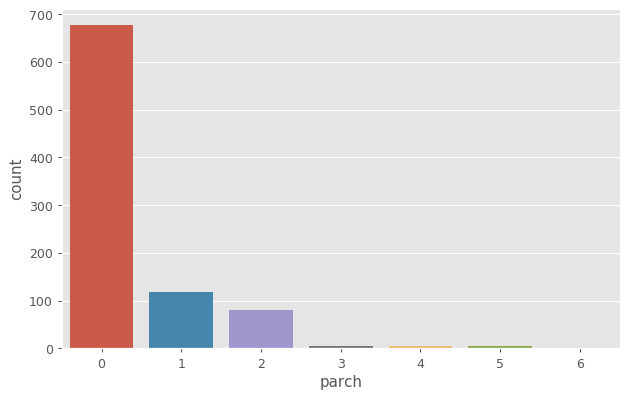

In [79]:
sns.countplot(titanic.parch)
plt.show()

- Most of the passengers were travelling alone not with parents/childrens.

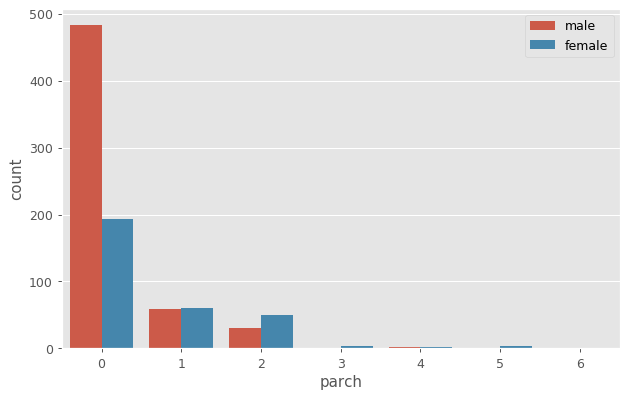

In [80]:
sns.countplot('parch', data = titanic, hue = 'sex')
plt.legend(loc = 'upper right')
plt.show()

- Male travels alone more than females.
- Male and Female ratio is almost equal when they have 1 parent/children.
- Females are more than Males when parent/children are 2.

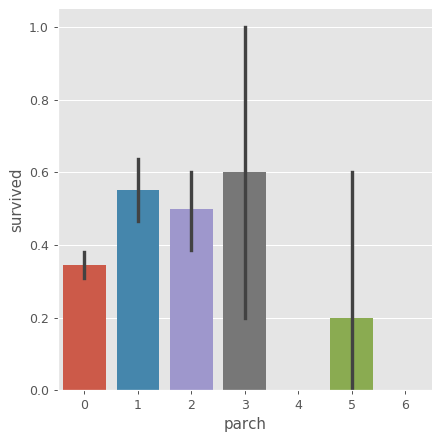

In [81]:
sns.catplot(x = 'parch', y = 'survived', data = titanic, kind = 'bar')
plt.show()

- passengers travelling alone have lower survival rate.
- Passengers having 1, 2 or 3 childrens/parents have higher probability of survival.

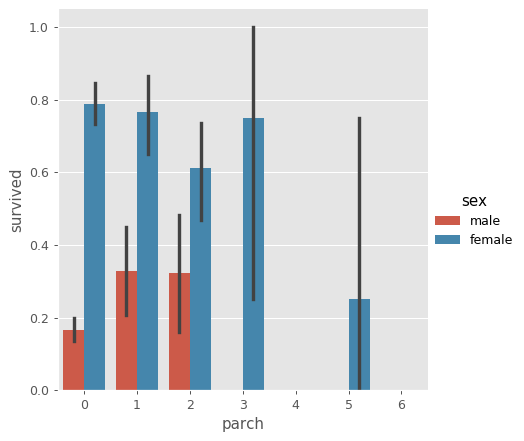

In [82]:
sns.catplot(x = 'parch', y = 'survived', data = titanic, kind = 'bar', hue = 'sex')
plt.show()

- Survival rate of females is lot higher than males.

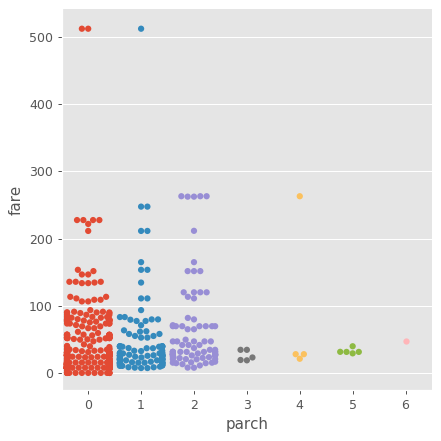

In [83]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm')
plt.show()

- Passengers travelling with parents/childrens have higher fare.

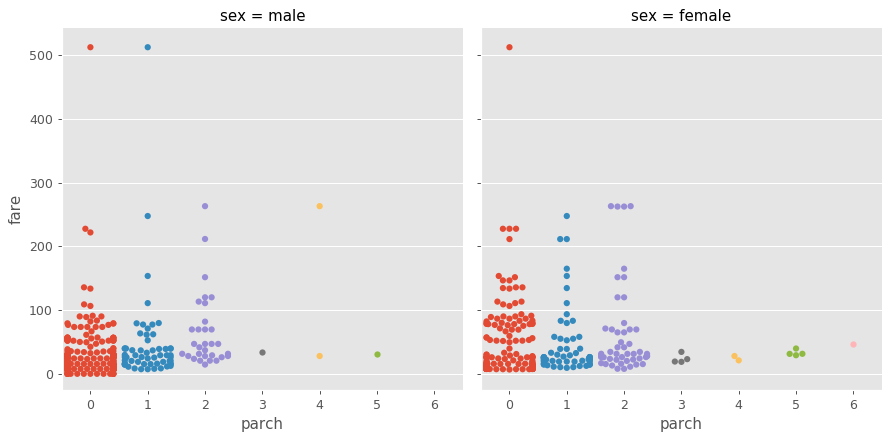

In [84]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm', col = 'sex')
plt.show()

- Most of the females were travelling eith 2 parents/children.
- More males were travelling alone(without parents/children) than females.
- Fare for female passengers were high than males who were travelling alone.

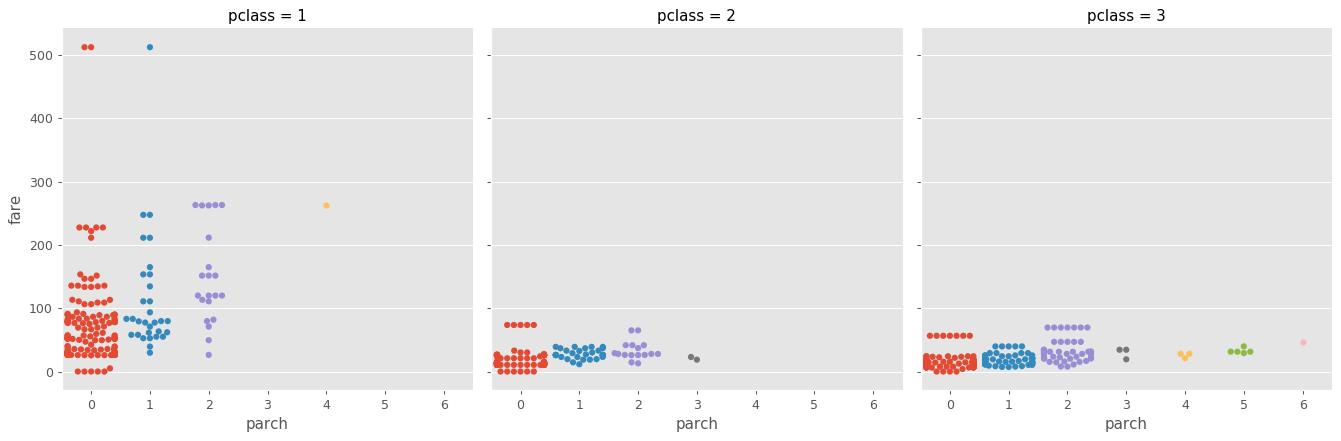

In [85]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass')
plt.show()

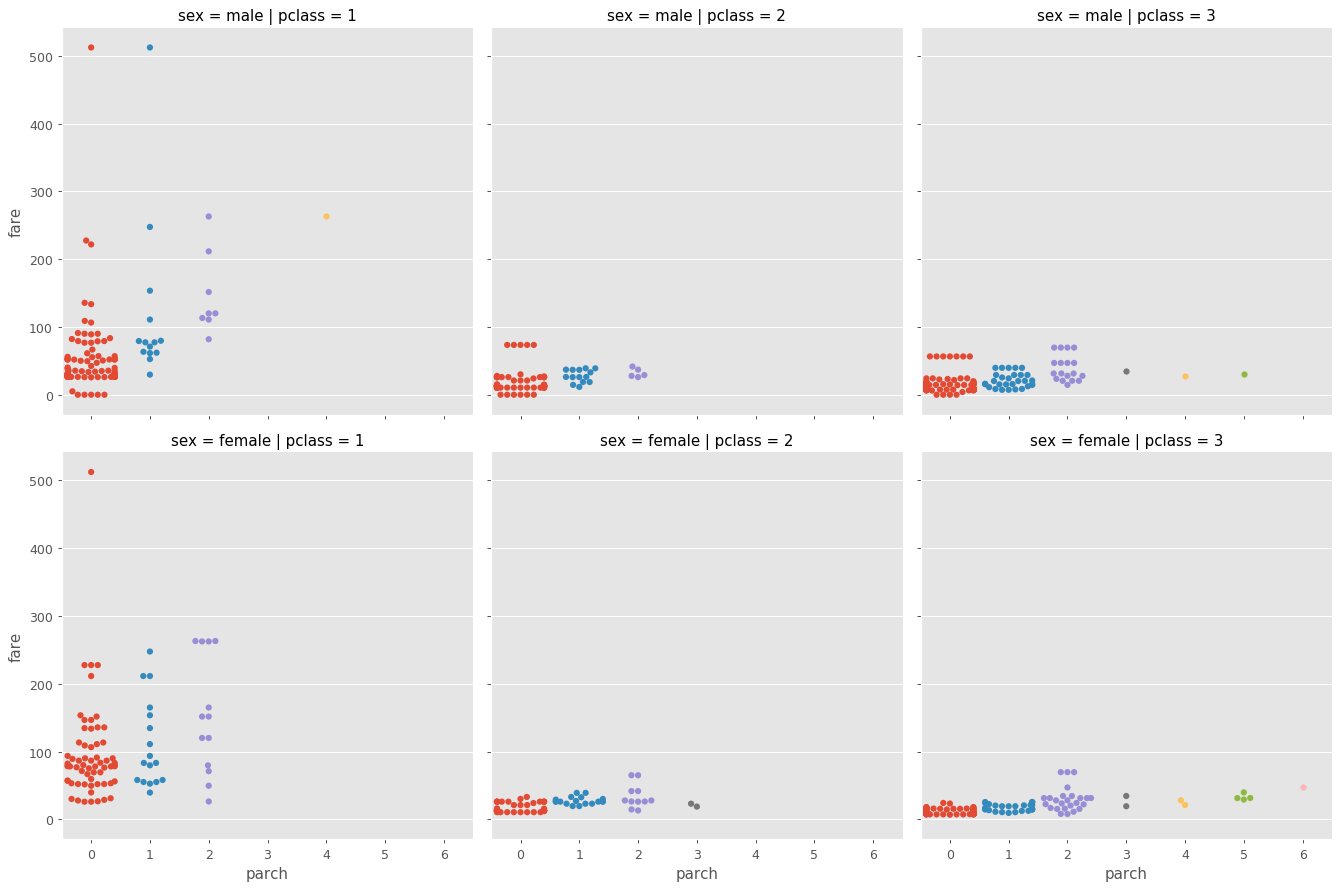

In [86]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass', row = 'sex')
plt.show()

- More passengers were travelling without parents/children.

## Embarked

In [87]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

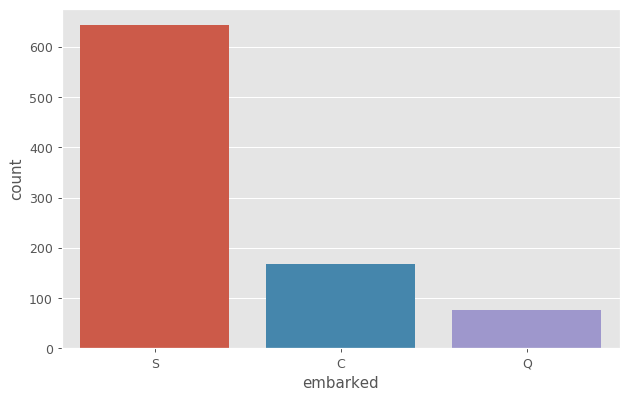

In [88]:
sns.countplot(titanic.embarked)
plt.show()

- Most of the peoples port of embarkation was `Southampton`.

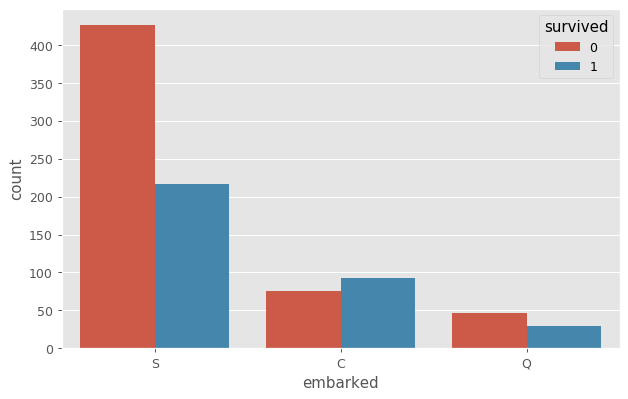

In [90]:
sns.countplot('embarked', data = titanic, hue = 'survived')
plt.show()

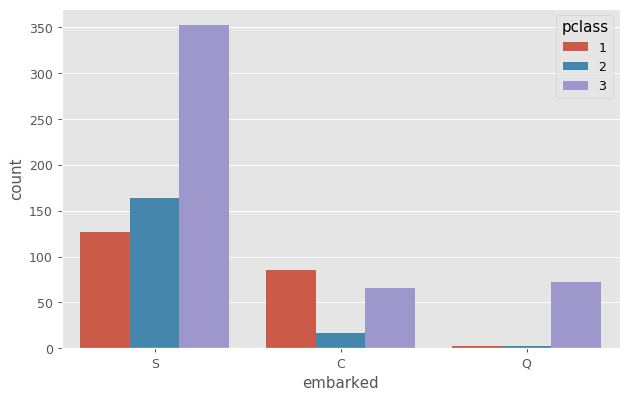

In [94]:
sns.countplot('embarked', data = titanic, hue = 'pclass')
plt.show()

- From above two graphs we can conclude that :- 
- Survival rate of Southampton and Cherbourg is high because most passengers travelling were of first class.

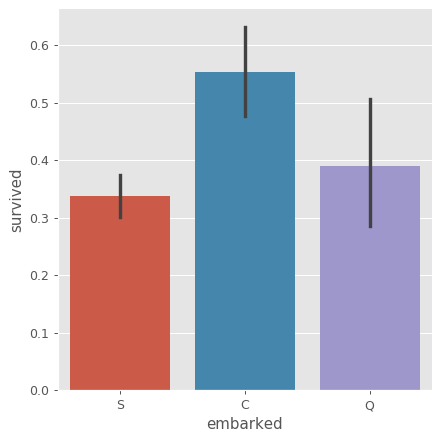

In [91]:
sns.catplot(x = 'embarked', y = 'survived', data = titanic, kind = 'bar')
plt.show()

- Peoples travelling from Cherbourg had highest rate of survival

<Figure size 900x360 with 0 Axes>

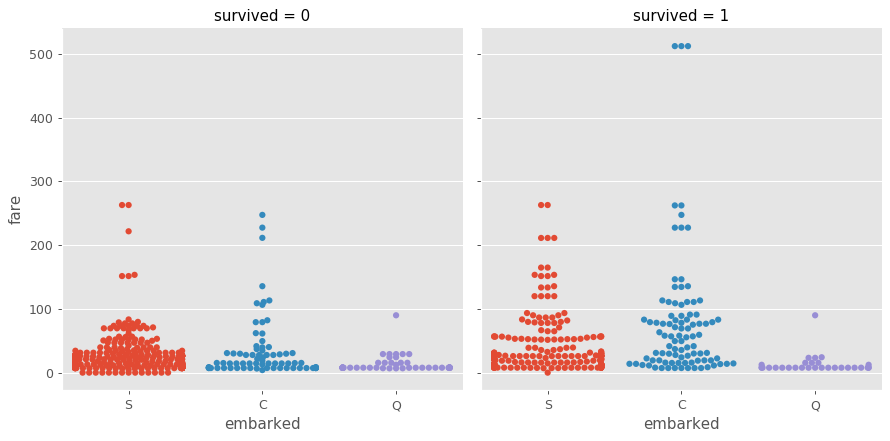

In [100]:
plt.figure(figsize = (10, 4))
sns.catplot(x = 'embarked', y = 'fare', data = titanic, kind = 'swarm', col = 'survived')
plt.show()

- People Survived more from Southampton and Cherbourg port because there fare were high

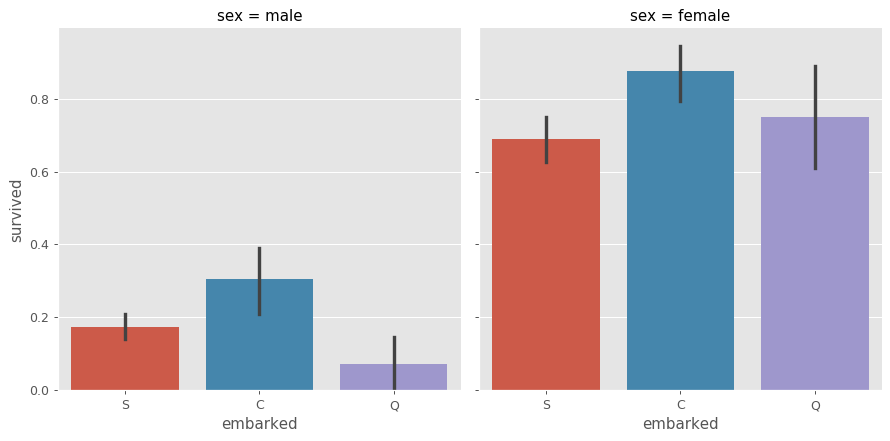

In [104]:
sns.catplot(x = 'embarked', y = 'survived', data = titanic, kind = 'bar', col = 'sex')
plt.show()

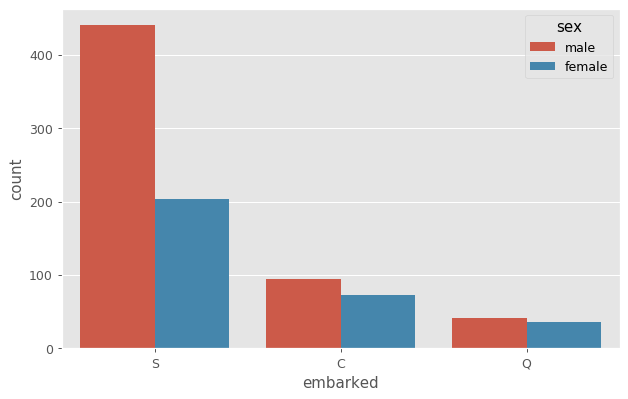

In [106]:
sns.countplot('embarked', data = titanic, hue = 'sex')
plt.show()

- Females and Males travelling from Cherbourg port survived more.
- Females travelling from Queenstown survived more than females survived from Southampton whereas in males it is quite different males travelling from Southampton survived more Reason from this can be because males travelled more from Southampton.

## Who

In [107]:
titanic.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

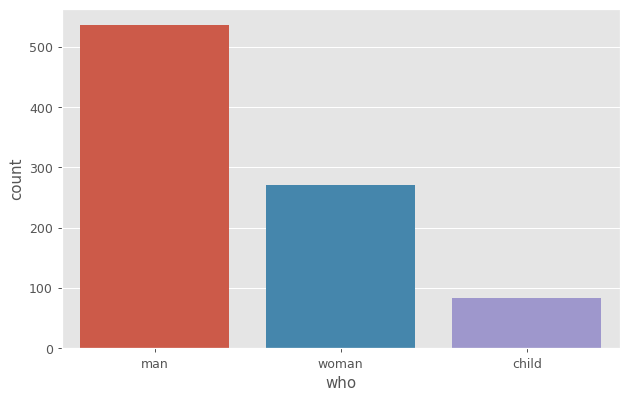

In [108]:
sns.countplot(titanic.who)
plt.show()

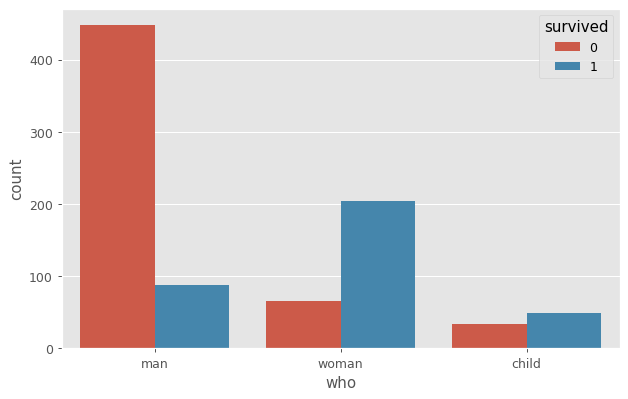

In [109]:
sns.countplot('who', data = titanic, hue = 'survived')
plt.show()

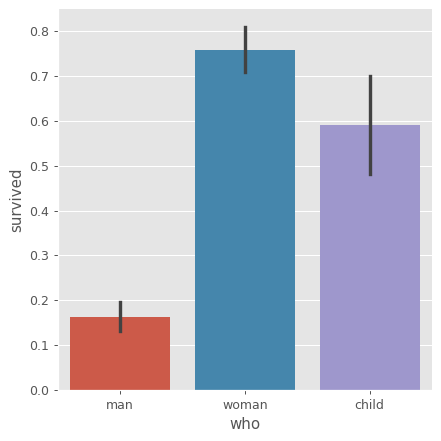

In [110]:
sns.catplot(x = 'who', y = 'survived', data = titanic, kind = 'bar')
plt.show()

- Survival rate of females and childs were higher than males.

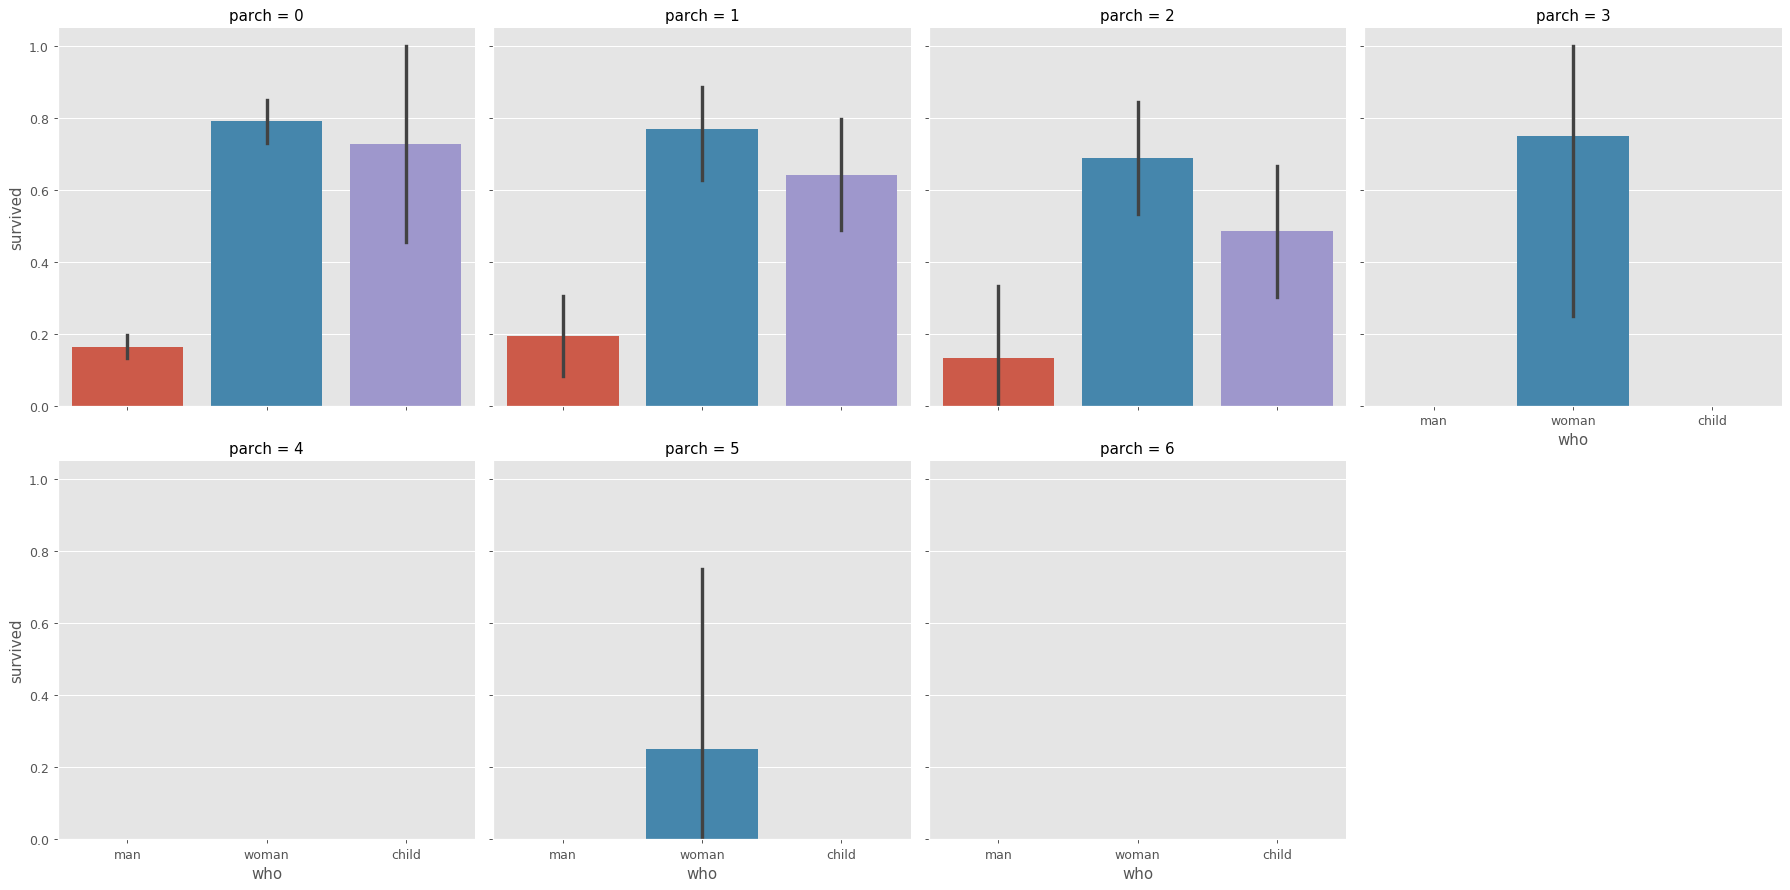

In [114]:
sns.catplot(x = 'who', y = 'survived', data = titanic, kind = 'bar', col = 'parch', col_wrap = 4)
plt.show()

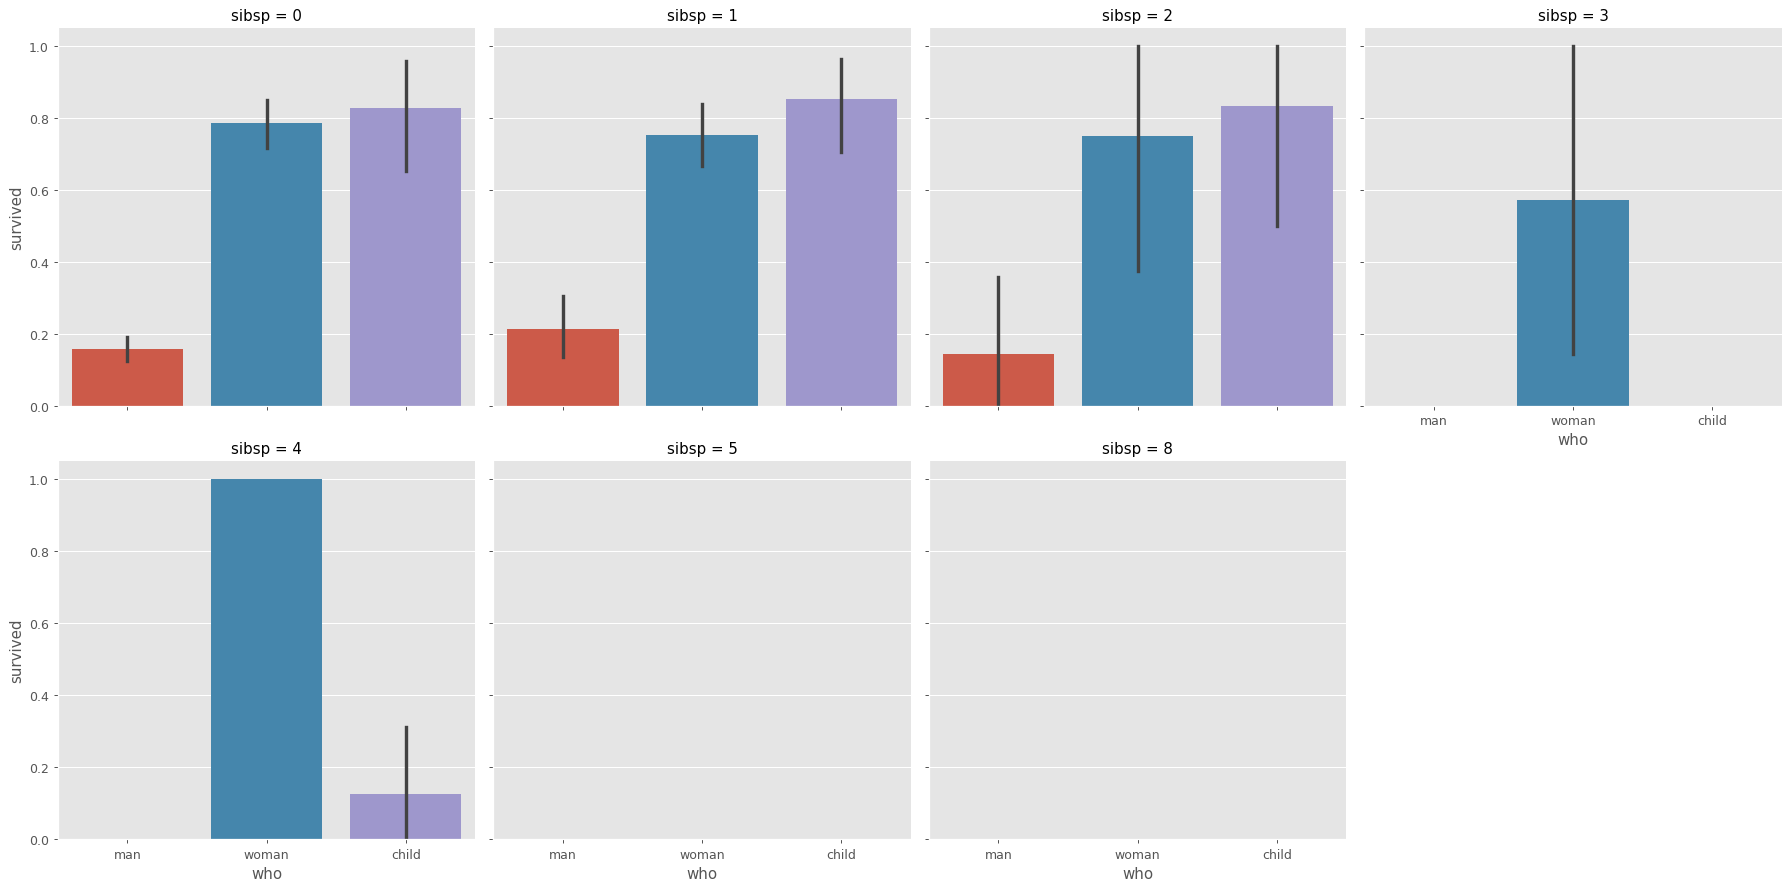

In [115]:
sns.catplot(x = 'who', y = 'survived', data = titanic, kind = 'bar', col = 'sibsp', col_wrap = 4)
plt.show()

- Childs having 1 or 2 siblings have high rate of survival.
- Womens having 4 siblings/spouses also have very high rate of survival.